In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Data/monthlyreturncapitalization.csv')
df['Monthly Calendar Date'] = pd.to_datetime(df['Monthly Calendar Date'])
df = df.sort_values(['Ticker', 'Monthly Calendar Date'])
df = df.drop_duplicates(subset=['Ticker', 'Monthly Calendar Date'], keep='last')

returns = df.pivot(index='Monthly Calendar Date', columns='Ticker', values='Monthly Total Return')

rf = pd.read_csv('Data/riskfree.csv')
rf['Calendar Date'] = pd.to_datetime(rf['Calendar Date'])
rf = rf.set_index('Calendar Date')['90 Day Bill Returns']

/var/folders/l_/8zvg9_s54490f5lkvsgxjvjh0000gn/T/ipykernel_77769/3043811662.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Monthly Calendar Date'] = pd.to_datetime(df['Monthly Calendar Date'])
/var/folders/l_/8zvg9_s54490f5lkvsgxjvjh0000gn/T/ipykernel_77769/3043811662.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  rf['Calendar Date'] = pd.to_datetime(rf['Calendar Date'])


In [3]:
start_date = '2017-01-01'
end_date = '2022-12-31'
returns_oos = returns.loc[start_date:end_date]

n_stocks = returns_oos.shape[1]
equal_weight = 1.0 / n_stocks

ew_returns = returns_oos.mean(axis=1)
ew_cumulative = (1 + ew_returns).cumprod()

In [4]:
rf_aligned = rf.loc[ew_returns.index]
excess_returns = ew_returns - rf_aligned

total_return = ew_cumulative.iloc[-1] - 1
annualized_return = (1 + total_return) ** (12 / len(ew_returns)) - 1
annualized_vol = ew_returns.std() * np.sqrt(12)
sharpe_ratio = excess_returns.mean() / excess_returns.std() * np.sqrt(12)

cummax = ew_cumulative.cummax()
drawdown = (ew_cumulative - cummax) / cummax
max_drawdown = drawdown.min()

print(f"Total Return: {total_return:.4f}")
print(f"Annualized Return: {annualized_return:.4f}")
print(f"Annualized Volatility: {annualized_vol:.4f}")
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")
print(f"Max Drawdown: {max_drawdown:.4f}")

Total Return: 1.9278
Annualized Return: 0.1961
Annualized Volatility: 0.1770
Sharpe Ratio: 1.0353
Max Drawdown: -0.2180


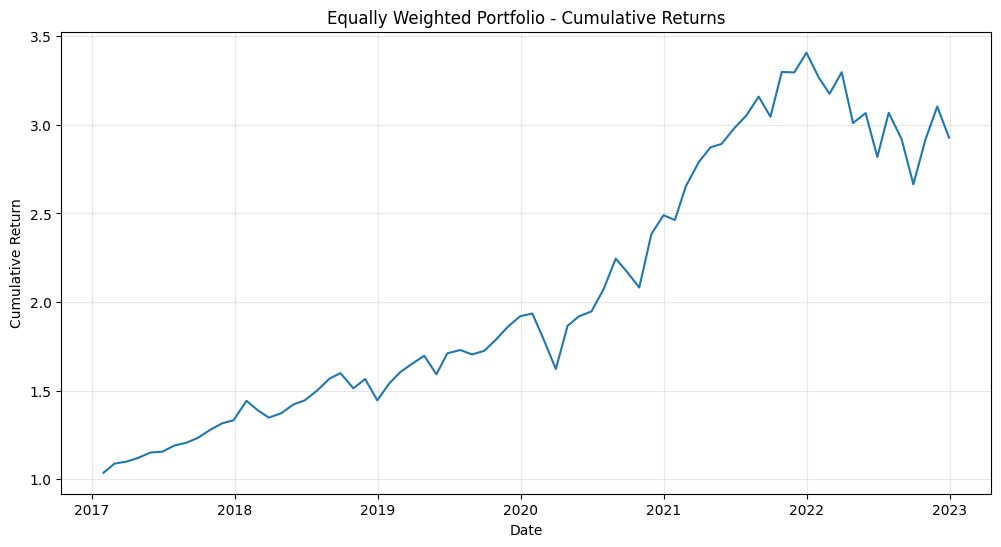

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(ew_cumulative.index, ew_cumulative.values)
plt.title('Equally Weighted Portfolio - Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid(True, alpha=0.3)
plt.show()